In [105]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical

In [106]:
model = load_model('temp/checkpoint/convnet03.h5')

In [107]:
label_names =  ['angry_alpaca_sas.tmp',
                'angry_bear_sas.tmp',
                'angry_bobcat_sas.tmp',
                'angry_camel_sas.tmp',
                'angry_cheetah_sas.tmp',
                'angry_deer_sas.tmp',
                'angry_dingo_a.tmp',
                'angry_goat_sas.tmp',
                'angry_gorilla_t.tmp',
                'angry_hare_sas.tmp',
                'angry_jackal_a.tmp',
                'angry_jaguar_sas.tmp',
                'angry_kangaroo_a.tmp',
                'angry_lion_t.tmp',
                'angry_mandrill_t.tmp',
                'angry_marmot_t.tmp',
                'angry_mink_sas.tmp',
                'angry_mole_t.tmp',
                'angry_mouse_t.tmp',
                'angry_puma_sas.tmp',
                'angry_rat_t.tmp',
                'angry_starling_ti.tmp',
                'angry_weasel_sas.tmp',
                'angry_wolf_sas.tmp',
                'angry_zebra_sas.tmp']

In [108]:
data = np.load('training_data/data03_test.npy')
labels = np.load('training_data/labels03_test.npy')

In [109]:
x = data
y = labels[:,0]

In [110]:
yh = model.predict(x).argmax(1)
prediction = pd.DataFrame()
prediction['yh'] = yh
prediction['y'] = y
ix = (prediction.y != prediction.yh)
print(ix.sum(),'testing mistakes of',len(ix),'total predictions')
print('test error rate',round(ix.sum()/len(ix),3))
print('Accuracy', round(1-ix.sum()/len(ix),3))

16/16 [==============================] - 1s 28ms/step
180 testing mistakes of 500 total predictions
test error rate 0.36
Accuracy 0.64


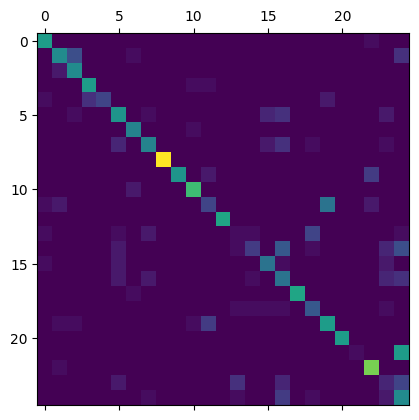

In [111]:
cm = confusion_matrix(y, yh)
plt.matshow(cm)
plt.show()

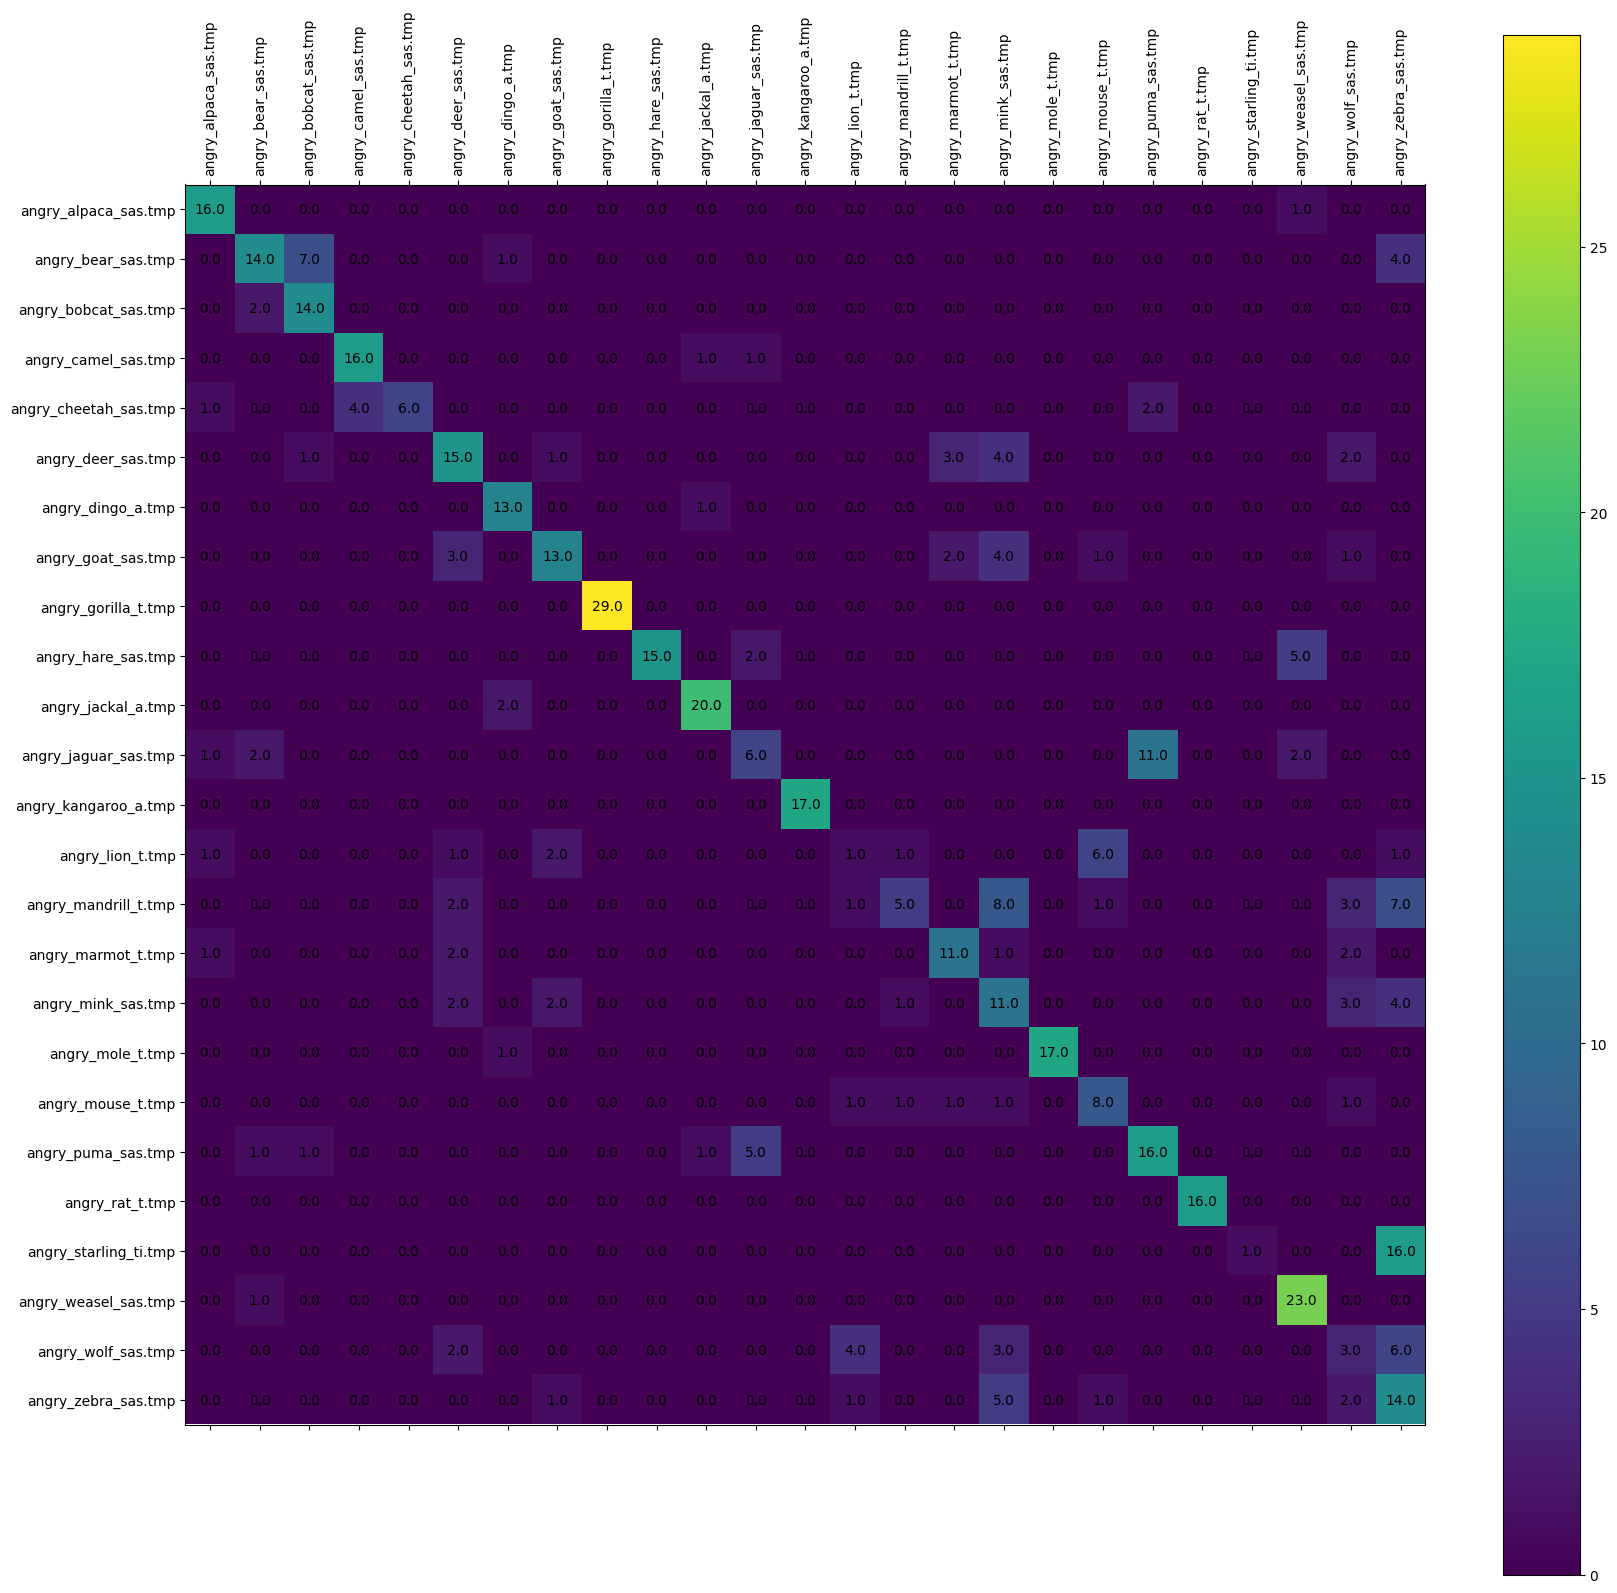

In [112]:
cm = confusion_matrix(y, yh)

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
cax = ax.matshow(cm, interpolation='nearest')
fig.colorbar(cax)
plt.xticks(rotation=90, ha='center')
plt.xticks(np.arange(0, max(y)+1, 1.0))
plt.yticks(np.arange(0, max(y)+1, 1.0))
ax.set_xticklabels(label_names)
ax.set_yticklabels(label_names)


for (i, j), z in np.ndenumerate(cm):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

plt.show()